In [1]:
import drops, utilities, wave_reflection
from scipy.optimize import fsolve
%matplotlib inline

In [ ]:
t = linspace(0, 100, 1000)

soln, impacts = drops.ode_standalone(t)

In [132]:
x = soln[:, 0, 0]
y = soln[:, 0, 1]
z = soln[:, 0, 2]

utilities.plot_path(soln)


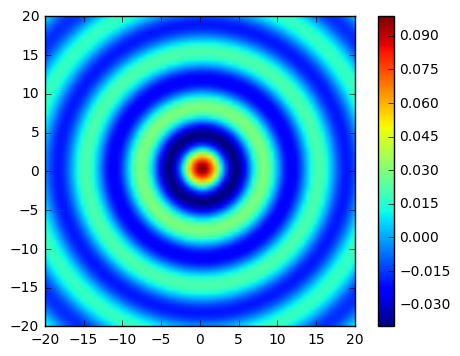

In [323]:
utilities.wave_field(30, impacts[:1], resolution=2)
plt.show()

In [96]:
impact = drops.Impact(0, -65, -30, 1)
point = (-70, -30)


# solutions should be -.6969, 7.969,   and 6.5122,   -4.6465, per sympy. 
# Your eqs are right, so wtf?

drops.find_wall_collision(impact, point)


AttributeError: module 'drops' has no attribute 'find_wall_collision'

In [95]:
from numpy import arctan2

s = sqrt(2)/2

xi, yi = -s, s
xw, yw = -s, -s
xp, yp = .5, .5


# θiw = arctan2(yw - yi, xw - xi)  # angle from impact to wall
θiw = arctan2(yw - yi, xw - xi) % τ  # angle from impact to wall
θw = arctan2(yw, xw) % τ # normal to the wall


θwp = (2 * θw - θiw + τ/2) % τ # bounce angle
θwp = ((2 * θw - θiw) + τ/2) % τ # bounce angle  # tdo 

print(θiw/τ, θw/τ, θwp/τ,  sep='\n')

0.75
0.625
0.0


1000 loops, best of 3: 1.25 ms per loop


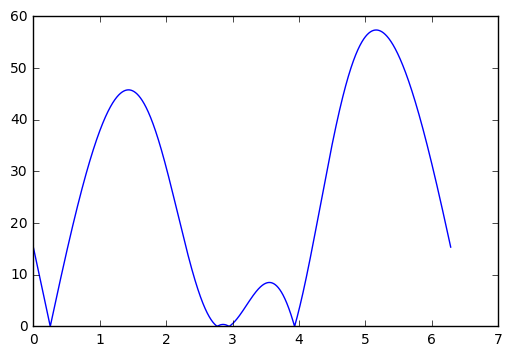

In [223]:
center = array([0, 0])

# This will cause 4 solutions!
# sample = drops.Point(-30, 0)
# impact = drops.Point(50, 9)


sample = array([-30., 1.1])
impact = array([50., 8.])

θ = linspace(0, τ, 5000)

cast = partial(wave_reflection.cast_ray, impact, sample, center)

dists = array(list(map(cast, θ)))
plt.plot(θ, dists)

%timeit list(wave_reflection.find_wall_collisions(impact, sample, center))

In [137]:
sample = array([-4, 0])
impact = array([6.6, 1])

%timeit list(wave_reflection.find_reflection_points(impact, sample))

The slowest run took 81.71 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 5.89 ms per loop


In [68]:
impacts = [drops.Impact(0, 0, 0, 1)]
#            drops.Impact(10, 100, 105, 1)]

# utilities.wave_field(20, impacts)
drops.net_surface_height(10, impacts, drops.Point(2, 2))

0.042282929280539616


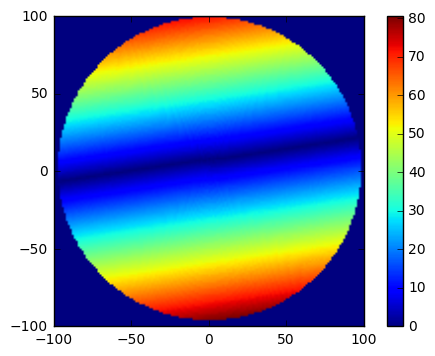

In [86]:
from itertools import product

sample = array([-30., 0.])
impact = array([50., 9.])

θiw = 0.26567148
# θiw = 2.77087142
# θiw = 3.0090949999999999
# θiw = 3.9505101599999999

print(θiw / τ)
utilities.reflection_field(impact, center, θiw)


